In [ ]:
# Somativa# 1 - Preparação dos dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score

In [ ]:
df = pd.read_csv ('https://raw.githubusercontent.com/danielvieira95/Intelig-ncia-Artificial-e-Big-Data--2-2024/refs/heads/master/Bases%20de%20dados/dados_produtos.csv')
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1


In [ ]:
# 2 - Exploração dos dados
df.info()
df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


<Axes: xlabel='product_name', ylabel='rating'>

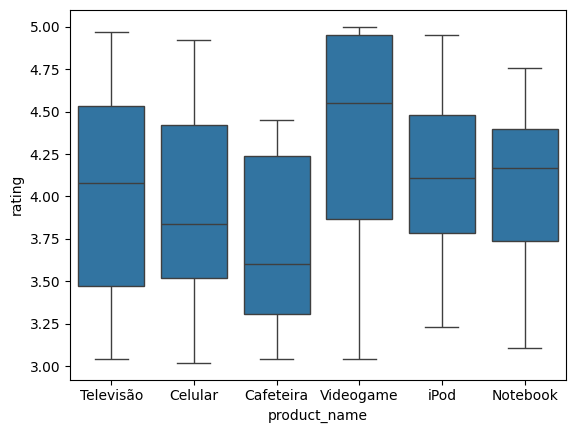

In [ ]:
sns.boxplot(x=df['product_name'],y=df['rating'])

In [ ]:
# 3 - Pré processamento dos dados
df.isnull().sum() 


product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64

In [56]:
col_n = df.select_dtypes(include='number') 
correlacao = col_n.corr()
correlacao

,rating,rating_count,purchased
rating,1.000000,0.051993,0.032637
rating_count,0.051993,1.000000,0.129694
purchased,0.032637,0.129694,1.000000


<Axes: >

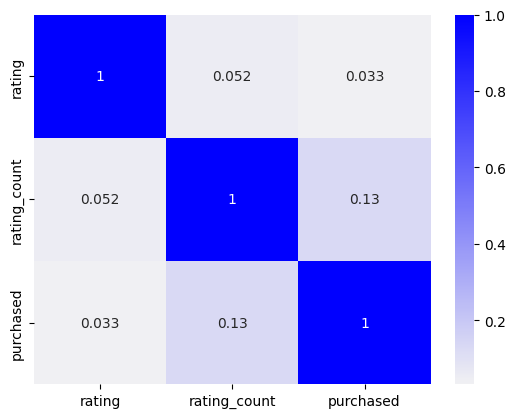

In [57]:
color = sns.color_palette('light:blue',as_cmap=True)
sns.heatmap(correlacao,cmap=color,annot=True) 

In [ ]:
# 4 - Divisão do conjunto de dados em treinamento e teste
produtos = df['product_name'].unique()
for produto in produtos:
    produto_df= df.loc[df['product_name']==produto]
X = produto_df.drop(['product_name','purchased'],axis=1) 
y = produto_df['purchased']   
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

Arvore de decisAo Televisão 

Precisão: 1.0 
 
Recall: 0.3333333333333333 
 
F1_score: 0.5 
 
Acuracia: 0.5 
 
Arvore de decisAo Celular 

Precisão: 0.5 
 
Recall: 1.0 
 
F1_score: 0.6666666666666666 
 
Acuracia: 0.6 
 
Arvore de decisAo Cafeteira 

Precisão: 0.0 
 
Recall: 0.0 
 
F1_score: 0.0 
 
Acuracia: 0.5 
 
Arvore de decisAo Videogame 

Precisão: 1.0 
 
Recall: 1.0 
 
F1_score: 1.0 
 
Acuracia: 1.0 
 
Arvore de decisAo iPod 

Precisão: 0.5 
 
Recall: 0.5 
 
F1_score: 0.5 
 
Acuracia: 0.5 
 
Arvore de decisAo Notebook 

Precisão: 0.3333333333333333 
 
Recall: 1.0 
 
F1_score: 0.5 
 
Acuracia: 0.5 
 


C:\Users\dsadm\AppData\Local\Temp\ipykernel_22960\177379059.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] =produto_df['purchased'].replace([1,0],['Comprou','Não comprou'])
C:\Users\dsadm\AppData\Local\Temp\ipykernel_22960\177379059.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  produto_df['purchased'] =produto_df['purchased'].replace([1,0],['Comprou','Não comprou'])
C:\Users\dsadm\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: Und

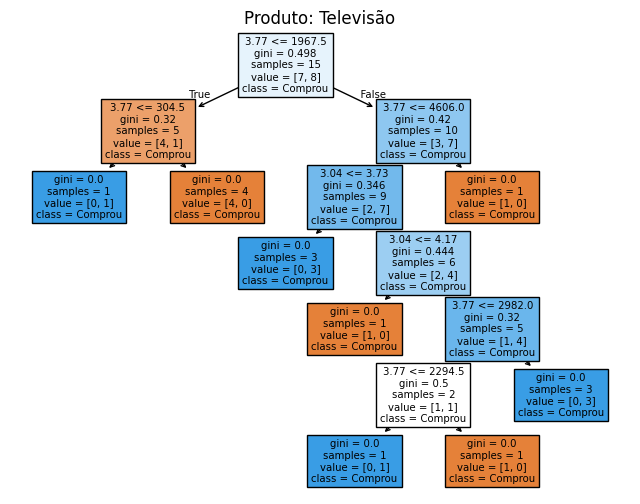

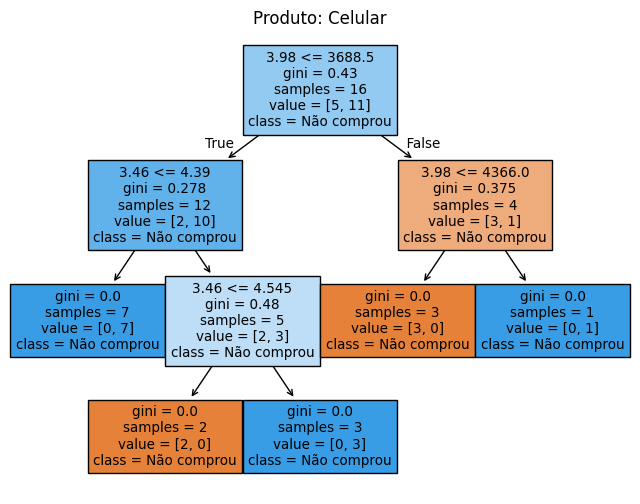

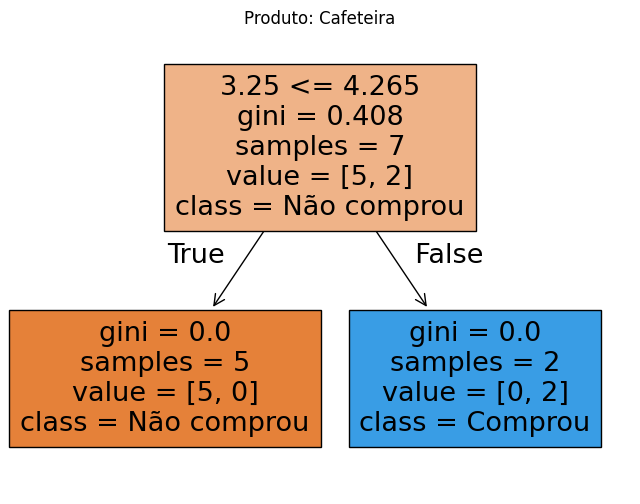

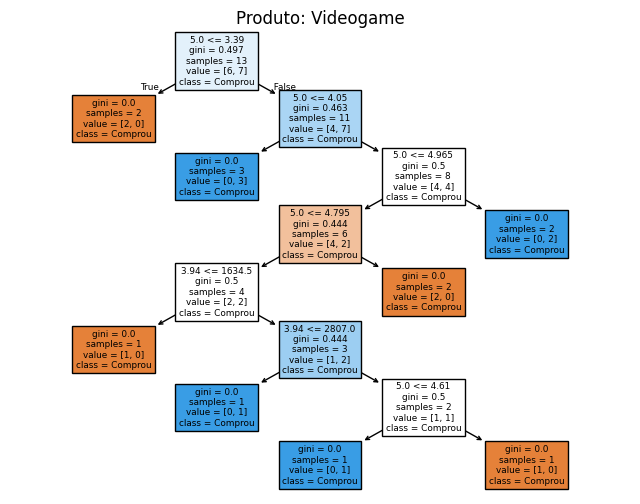

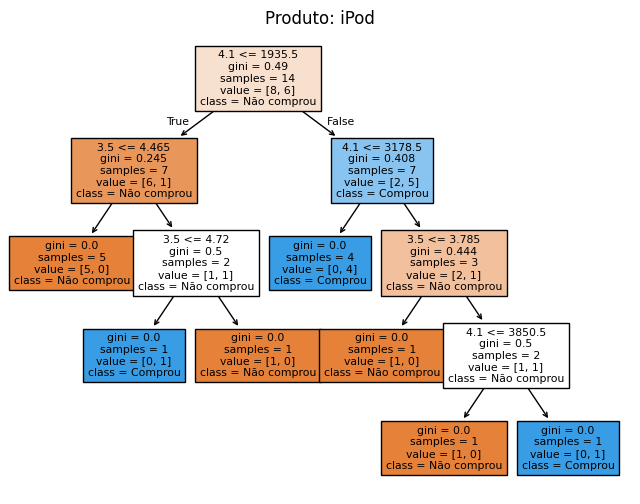

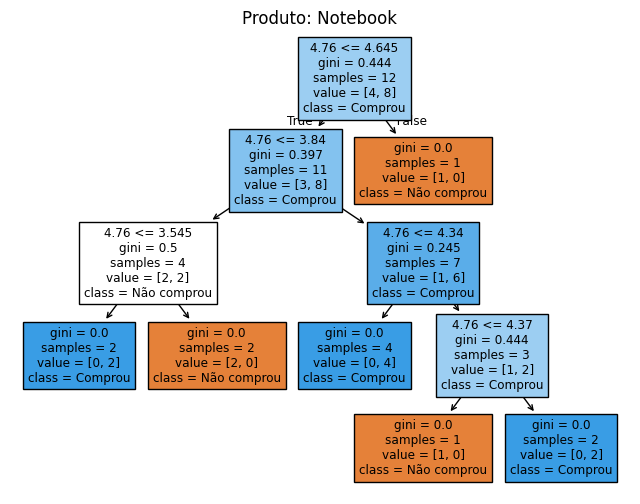

In [ ]:
# 5  - Criar modelo de Árvore de decisão 
for produto in produtos:
    produto_df= df.loc[df['product_name']==produto]
    X = produto_df.drop(['product_name','purchased'],axis=1) 
    y = produto_df['purchased']
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)
    
    modelo = DecisionTreeClassifier()
    modelo.fit(X_train,y_train) 
    ypred = modelo.predict(X_test)

    print(f'Arvore de decisAo {produto} \n')
    print(f'Precisão: {precision_score(y_test,ypred)} \n ')  
    print(f'Recall: {recall_score(y_test,ypred)} \n ') 
    print(f'F1_score: {f1_score(y_test,ypred)} \n ')
    print(f'Acuracia: {accuracy_score(y_test,ypred)} \n ')
    
    produto_df['purchased'] =produto_df['purchased'].replace([1,0],['Comprou','Não comprou'])
    figure = plt.figure(figsize=(8,6))
    tree.plot_tree(modelo,feature_names=produto_df['rating'].tolist(), class_names=produto_df['purchased'].tolist(),filled=True)
    plt.title(f'Produto: {produto}')

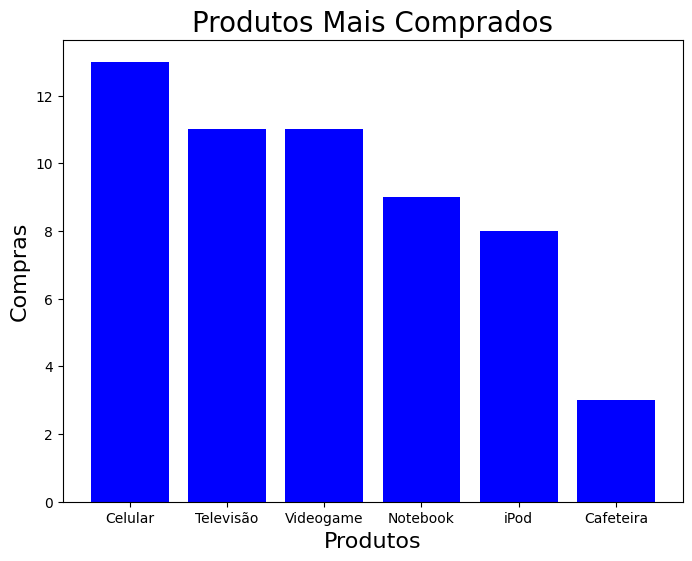

In [ ]:
#Prova - 9
produtos_comprados = df[df['purchased'] == 1] 
contagem_produtos = produtos_comprados['product_name'].value_counts().reset_index()
contagem_produtos.columns = ['Produto', 'Contagem']

plt.figure(figsize=(8, 6))
plt.bar(contagem_produtos['Produto'], contagem_produtos['Contagem'], color='blue')
plt.xlabel('Produtos', fontsize=16)
plt.ylabel('Compras', fontsize=16)
plt.title("Produtos Mais Comprados", fontsize=20)
plt.show()